**Import Dataset**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
np.random.seed(10)

from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from keras.utils import plot_model

#reading csv files
train =pd.read_csv("train.csv", encoding= 'unicode_escape')
test =pd.read_csv("test.csv", encoding= 'unicode_escape')              
             

#train_test split
x_tr, y_tr = train['text'], train['label']
x_val, y_val = test['text'], test['label']


**Proses Tokenizing dan Pad Sequence**

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#from nltk.corpus import stopwords
#Tokenize the sentences
tokenizer = Tokenizer()

#preparing vocabulary
tokenizer.fit_on_texts(list(x_tr))

#converting text into integer sequences
x_tr_seq  = tokenizer.texts_to_sequences(x_tr) 
x_val_seq = tokenizer.texts_to_sequences(x_val)


#padding to prepare sequences of same length
x_tr_seq  = pad_sequences(x_tr_seq, maxlen=100)
x_val_seq = pad_sequences(x_val_seq, maxlen=100)


In [ ]:
x_val_seq

array([[   0,    0,    0, ...,    2,    3,   15],
       [   0,    0,    0, ...,   52,    3,   15],
       [   0,    0,    0, ...,   32,   47, 1000],
       ...,
       [   0,    0,    0, ...,   37,    5,  234],
       [   0,    0,    0, ...,  107,   10, 1002],
       [   0,    0,    0, ...,   39,   17,  243]], dtype=int32)

In [ ]:
test.label.value_counts()


0    1030
1     970
Name: label, dtype: int64

In [ ]:
train.label.value_counts()


1    4030
0    3969
Name: label, dtype: int64

**Melihat Hasil Tokenizing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
size_of_vocabulary=len(tokenizer.word_index) + 1 #+1 for padding
print(size_of_vocabulary)


14074


**Hasil Pad Sequence**

In [ ]:
x_val_seq[100]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     7,    20,     4, 10853,   231,     4,
         281,   376,  9656, 10853,   337,  1933,  3698,    76,    15,
         120,    53,   446,    23,   426,   472,  3567,    74,     3,
        1305,     2,    78,    25,    43,     1,     9,     3,   396,
           7,   452,    11, 10853,   337,   153,     7,    68,     2,
           7,    27,  5748,    11,  2388,   223,    11,  4149,  3163,
        2232,  5940,     5,    30,    55,     7,    16,   408,  2938,
        1905,  1231,   210,   379,    23,     6,  1933,   174,    20,
           4, 10853,  1335,    44,    14,   281,     7,   103,   697,
          35], dtype=int32)

**Build Model LSTM**

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1407400   
_________________________________________________________________
lstm (LSTM)                  (None, 100, 128)          117248    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,532,969
Trainable params: 1,532,969
Non-trainable params: 0
_________________________________________________________________
None


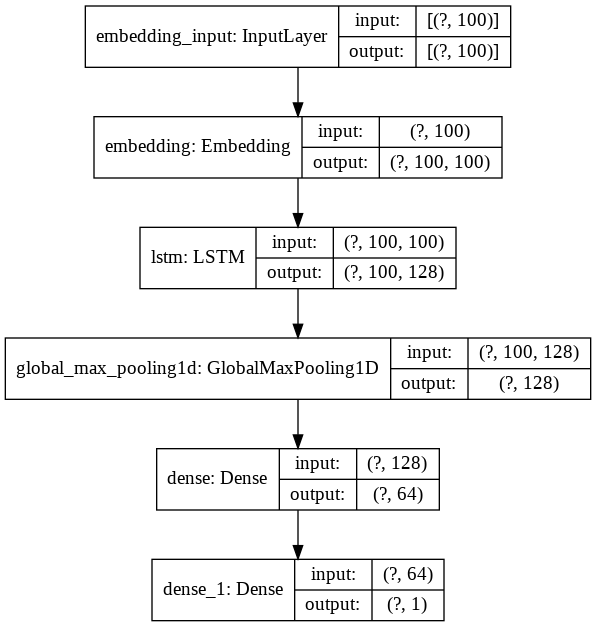

In [ ]:
from keras.models import *
from keras.layers import *
from keras.callbacks import *

model=Sequential()

#embedding layer
model.add(Embedding(input_dim=size_of_vocabulary,output_dim=100,input_length=100)) 

#lstm layer
model.add(LSTM(128,return_sequences=True,dropout=0.2))

#Global Maxpooling
model.add(GlobalMaxPooling1D())

#Dense Layer
model.add(Dense(64,activation='relu')) 
model.add(Dense(1,activation='sigmoid')) 

#Add loss function, metrics, optimizer
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=["acc"]) 

#Adding callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)  
mc=ModelCheckpoint('best_nomodel.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)  

#Print summary of model
print(model.summary())
plot_model(model, to_file='nomodel_plot.png', show_shapes=True, show_layer_names=True,rankdir='TB')

**Compile Model Dengan Dataset**

In [ ]:
history2 = model.fit(np.array(x_tr_seq),np.array(y_tr),batch_size=128,epochs=20,validation_data=(np.array(x_val_seq),np.array(y_val)),verbose=1,callbacks=[es,mc])

Epoch 1/20
63/63 [==============================] - ETA: 0s - loss: 0.5184 - acc: 0.7777
Epoch 00001: val_acc improved from -inf to 0.91350, saving model to best_nomodel.h5
63/63 [==============================] - 25s 398ms/step - loss: 0.5184 - acc: 0.7777 - val_loss: 0.2127 - val_acc: 0.9135
Epoch 2/20
63/63 [==============================] - ETA: 0s - loss: 0.1077 - acc: 0.9630
Epoch 00002: val_acc improved from 0.91350 to 0.95850, saving model to best_nomodel.h5
63/63 [==============================] - 24s 385ms/step - loss: 0.1077 - acc: 0.9630 - val_loss: 0.0941 - val_acc: 0.9585
Epoch 3/20
63/63 [==============================] - ETA: 0s - loss: 0.0316 - acc: 0.9899
Epoch 00003: val_acc improved from 0.95850 to 0.96500, saving model to best_nomodel.h5
63/63 [==============================] - 24s 385ms/step - loss: 0.0316 - acc: 0.9899 - val_loss: 0.0889 - val_acc: 0.9650
Epoch 4/20
63/63 [==============================] - ETA: 0s - loss: 0.0178 - acc: 0.9961
Epoch 00004: val_acc

**Visualisasi Hasil Compile**

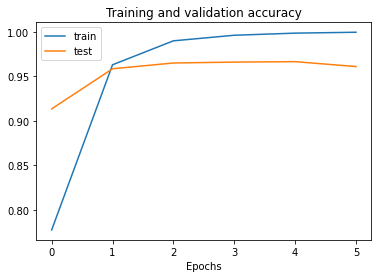

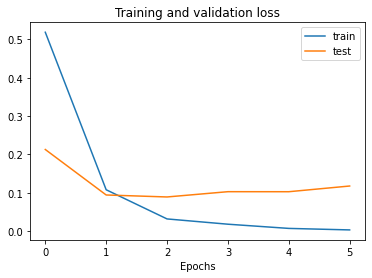

In [ ]:
import matplotlib.pyplot as plt
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(history2.history['acc'], label='train')
plt.plot(history2.history['val_acc'], label='test')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.figure()
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Prediksi Model**

In [ ]:
#loading best model
from keras.models import load_model
model = load_model('best_nomodel.h5')

#evaluation 
y_pred = model.predict(x_val_seq.round())
print(y_pred)


[[9.9992120e-01]
 [4.3579647e-01]
 [9.7117501e-01]
 ...
 [4.2197108e-04]
 [4.1531739e-06]
 [5.1268591e-05]]


In [ ]:
#loading best model
from keras.models import load_model
model = load_model('best_nomodel.h5')

y_pred = model.predict_classes(x_val_seq)
print(y_pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[1]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


In [ ]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
from keras.models import load_model
from keras.preprocessing import sequence
import pickle
model = load_model('best_nomodel.h5')
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

s  = ["bersih pelayanan extra karena kebetulan dapat kejutan jadi tamu vip di hari itu dapat free cake dan tea time salah satu hotel yang menyediakan executive room dengan harga terjangkau tapi pelayanan dan kamar yang bagus"]
seq_str = tokenizer.texts_to_sequences(s)
enc_str = sequence.pad_sequences(seq_str, maxlen=100)
pred = model.predict_classes(enc_str)
print("Prediksi kelas string ' {} ' adalah {}".format(s,pred))

Prediksi kelas string ' ['bersih pelayanan extra karena kebetulan dapat kejutan jadi tamu vip di hari itu dapat free cake dan tea time salah satu hotel yang menyediakan executive room dengan harga terjangkau tapi pelayanan dan kamar yang bagus'] ' adalah [[1]]


In [ ]:
from keras.models import load_model
from keras.preprocessing import sequence
import pickle
model = load_model('best_nomodel.h5')
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

s  = ["pelayanan recepsionist kurang ramah dan lambat sudah hari menginap masih ditanya kupon kolam renang sama security"]
seq_str = tokenizer.texts_to_sequences(s)
enc_str = sequence.pad_sequences(seq_str, maxlen=100)
pred = model.predict_classes(enc_str)
print("Prediksi kelas string ' {} ' adalah {}".format(s,pred))

Prediksi kelas string ' ['pelayanan recepsionist kurang ramah dan lambat sudah hari menginap masih ditanya kupon kolam renang sama security'] ' adalah [[0]]


**Evaluasi Model Compile**

In [ ]:
#loading best model
from keras.models import load_model
model = load_model('best_nomodel.h5')

#evaluation 
_,val_acc1 = model.evaluate(x_val_seq,y_val, batch_size=128)
print("loss: %.2f" % (_))
print("acc: %.2f" % (val_acc1))


16/16 [==============================] - 2s 104ms/step - loss: 0.1187 - acc: 0.9705
loss: 0.12
acc: 0.97


**Evaluasi Kinerja Model LSTM**

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, y_pred.round()))


[[1003   27]
 [  40  930]]


**Visualisasi Kinerja Model**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


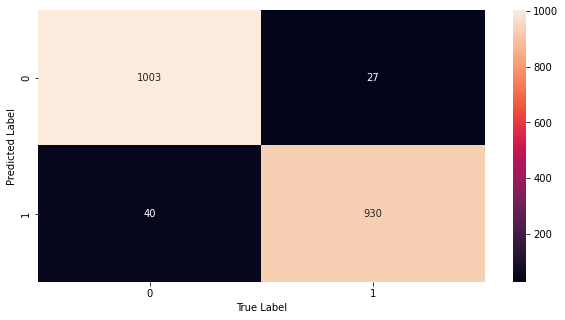

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(y_val, y_pred.round()), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

**Klasifikasi Report Model LSTM**

In [ ]:
from sklearn.metrics import classification_report
from keras.models import load_model
model = load_model('best_nomodel.h5')

print (classification_report(y_val, y_pred.round()))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: {:.2f}'.format(accuracy_score(y_val, y_pred.round())))
print('Precision: {:.2f}'.format(precision_score(y_val, y_pred.round())))
print('Recall: {:.2f}'.format(recall_score(y_val, y_pred.round())))
print('F1: {:.2f}'.format(f1_score(y_val, y_pred.round())))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1030
           1       0.97      0.96      0.97       970

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

Accuracy: 0.97
Precision: 0.97
Recall: 0.96
F1: 0.97


**Import Glove**

In [ ]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('drive/My Drive/SKRIPSI/glove100dwiki.txt', 'r', encoding='utf-8')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 377829 word vectors.


**Membuat Weight Matrix dari Glove Pre-Trained**

In [ ]:
# membuat weight matriks untuk training dataset
embedding_matrix = np.zeros((size_of_vocabulary, 100))

tokens = []
labels = []

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
        tokens.append(embedding_matrix[i])
        labels.append(word)

**Build Model LSTM**

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1407400   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 128)          117248    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 1,532,969
Trainable params: 1,532,969
Non-trainable params: 0
_________________________________________________________________
None


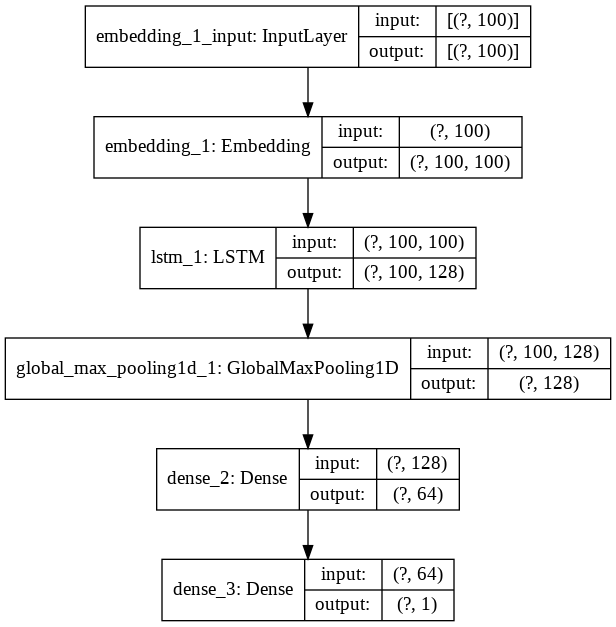

In [ ]:
model=Sequential()

#embedding layer
model.add(Embedding(size_of_vocabulary,100,weights=[embedding_matrix],input_length=100,trainable=True)) 

#lstm layer
model.add(LSTM(128,return_sequences=True,dropout=0.2))

#Global Maxpooling
model.add(GlobalMaxPooling1D())

#Dense Layer
model.add(Dense(64,activation='relu')) 
model.add(Dense(1,activation='sigmoid')) 

#Add loss function, metrics, optimizer
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=["acc"]) 

#Adding callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)  
mc=ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)  

#Print summary of model
print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,rankdir='TB')

**Compile klasifikasi Dengan Dataset**

In [ ]:
history3 = model.fit(np.array(x_tr_seq),np.array(y_tr),batch_size=128,epochs=20,validation_data=(np.array(x_val_seq),np.array(y_val)),verbose=1,callbacks=[es,mc])

Epoch 1/20
63/63 [==============================] - ETA: 0s - loss: 0.4599 - acc: 0.7868
Epoch 00001: val_acc improved from -inf to 0.88600, saving model to best_model.h5
63/63 [==============================] - 25s 404ms/step - loss: 0.4599 - acc: 0.7868 - val_loss: 0.2930 - val_acc: 0.8860
Epoch 2/20
63/63 [==============================] - ETA: 0s - loss: 0.2459 - acc: 0.8965
Epoch 00002: val_acc improved from 0.88600 to 0.91900, saving model to best_model.h5
63/63 [==============================] - 25s 391ms/step - loss: 0.2459 - acc: 0.8965 - val_loss: 0.2136 - val_acc: 0.9190
Epoch 3/20
63/63 [==============================] - ETA: 0s - loss: 0.1558 - acc: 0.9401
Epoch 00003: val_acc improved from 0.91900 to 0.95600, saving model to best_model.h5
63/63 [==============================] - 25s 391ms/step - loss: 0.1558 - acc: 0.9401 - val_loss: 0.1266 - val_acc: 0.9560
Epoch 4/20
63/63 [==============================] - ETA: 0s - loss: 0.1049 - acc: 0.9615
Epoch 00004: val_acc did n


**Hasil Visualisasi Compile** 

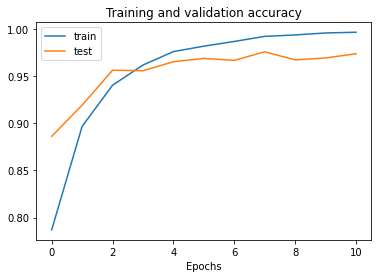

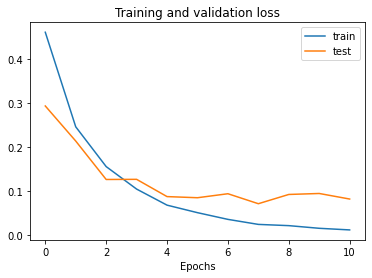

In [ ]:
import matplotlib.pyplot as plt
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(history3.history['acc'], label='train')
plt.plot(history3.history['val_acc'], label='test')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.figure()
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='test')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Evaluasi Model LSTM**

In [ ]:
#loading best model
from keras.models import load_model
model = load_model('best_model.h5')

#evaluation 
_,val_acc = model.evaluate(x_val_seq,y_val, batch_size=128)
print("loss: %.2f" % (_))
print("acc: %.2f" % (val_acc))

16/16 [==============================] - 2s 106ms/step - loss: 0.0770 - acc: 0.9745
loss: 0.08
acc: 0.97


**Prediksi Model LSTM**

In [ ]:
#loading best model
from keras.models import load_model
model = load_model('best_model.h5')

#Prediction 
y_pred1 = model.predict(x_val_seq)

print(y_pred1)


[[9.9981552e-01]
 [8.1723875e-01]
 [6.4440411e-01]
 ...
 [6.7083565e-05]
 [3.9883565e-07]
 [5.7625980e-06]]


**Test Prediksi Dengan Model**

In [ ]:
from keras.models import load_model
from keras.preprocessing import sequence
import pickle
model = load_model('best_model.h5')
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

s  = ["bersih pelayanan extra karena kebetulan dapat kejutan jadi tamu vip di hari itu dapat free cake dan tea time salah satu hotel yang menyediakan executive room dengan harga terjangkau tapi pelayanan dan kamar yang bagus"]
seq_str = tokenizer.texts_to_sequences(s)
enc_str = sequence.pad_sequences(seq_str, maxlen=100)
pred = model.predict_classes(enc_str)
print("Prediksi kelas string ' {} ' adalah {}".format(s,pred))

Prediksi kelas string ' ['bersih pelayanan extra karena kebetulan dapat kejutan jadi tamu vip di hari itu dapat free cake dan tea time salah satu hotel yang menyediakan executive room dengan harga terjangkau tapi pelayanan dan kamar yang bagus'] ' adalah [[1]]


In [ ]:
from keras.models import load_model
from keras.preprocessing import sequence
import pickle
model = load_model('best_model.h5')
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

s  = ["pelayanan recepsionist kurang ramah dan lambat sudah hari menginap masih ditanya kupon kolam renang sama security"]
seq_str = tokenizer.texts_to_sequences(s)
enc_str = sequence.pad_sequences(seq_str, maxlen=100)
pred = model.predict_classes(enc_str)
print("Prediksi kelas string ' {} ' adalah {}".format(s,pred))

Prediksi kelas string ' ['pelayanan recepsionist kurang ramah dan lambat sudah hari menginap masih ditanya kupon kolam renang sama security'] ' adalah [[0]]


In [ ]:
x_val[5]

'lokasinya dekat dengan stasiun dan paskal sekitar hotel banyak yang jualan makanan untuk kamarnya sangat standar'

In [ ]:
#loading best model
from keras.models import load_model
model = load_model('best_model.h5')

y_pred2 = model.predict_classes([5])
print(y_pred2)

[[1]]


**Evaluasi Kinerja Model LSTM**

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_val, y_pred1.round()))


Confusion Matrix
[[994  36]
 [ 15 955]]


**Visualisasi Kinerja Model LSTM**

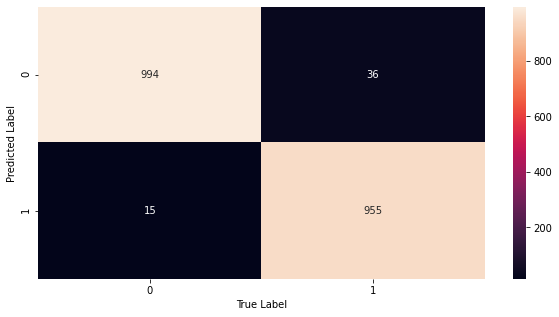

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(y_val, y_pred1.round()), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

**Report Model LSTM**

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_val, y_pred1.round()))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: {:.2f}'.format(accuracy_score(y_val, y_pred1.round())))
print('Precision: {:.2f}'.format(precision_score(y_val, y_pred1.round())))
print('Recall: {:.2f}'.format(recall_score(y_val, y_pred1.round())))
print('F1: {:.2f}'.format(f1_score(y_val, y_pred1.round())))


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1030
           1       0.97      0.98      0.97       970

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

Accuracy: 0.97
Precision: 0.97
Recall: 0.98
F1: 0.97


**Visualisasi Hasil Representasi  Word Embedding Glove Dengan Dataset**

(100, 2)


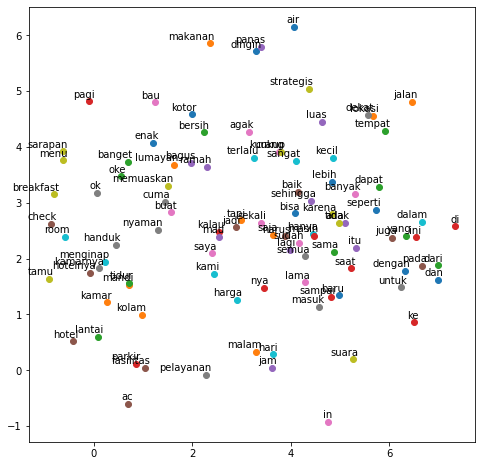

In [ ]:
#TSNE algorithm used to visualize word embeddings having huge amount (100) dimensions

def tsne():
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', random_state=23)
    new_values = tsne_model.fit_transform(tokens[:100])
    print(new_values.shape)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

    
    
    
    
tsne()
    